<a href="https://colab.research.google.com/github/davidk003/CAPEScraper/blob/main/Copy_of_CSE151A_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1

In [3]:
!git clone https://github.com/ucsd-cse151a-ss124/hw1.git

Cloning into 'hw1'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 29 (delta 12), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (29/29), 20.23 KiB | 3.37 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**


Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

<Axes: >

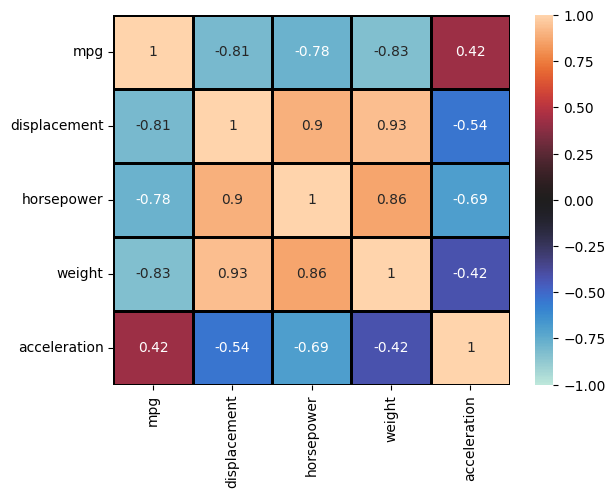

In [35]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("hw1/auto-mpg.csv")
df.drop(columns=["origin"], inplace=True)
df.head()
kwargs = {  "vmin" :-1,
            "vmax": 1,
            "center": 0,
            "linewidths": 1,
            "linecolor": 'black'}
sns.heatmap(df.corr(), annot=True, **kwargs)




**Answer:**:
We are least likely to choose the region of origin as the independent variable due to how little it is likely to affect ``mpg`` compared to the rest of the attributes which are guaranteed to have a performance differences due to them.


### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

<Axes: xlabel='horsepower', ylabel='mpg'>

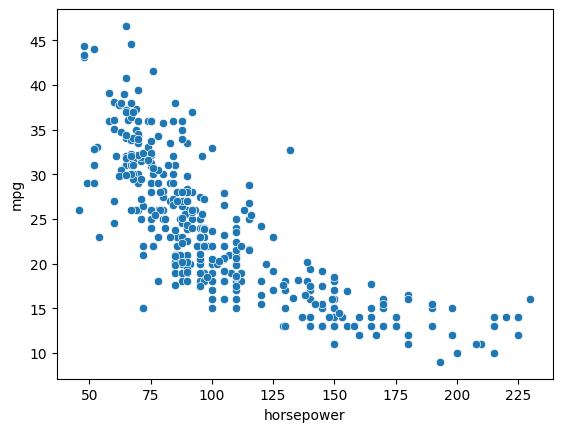

In [36]:
df = pd.read_csv("hw1/auto-mpg.csv")
df.drop(columns=["origin"], inplace=True)
df.head()
sns.scatterplot(data=df, x="horsepower", y="mpg")


**Answer:**

## Exercise 2 - Linear and Polynomial Regression (40 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

Print the shapes of the training and testing set.

In [53]:
df = pd.read_csv("hw1/auto-mpg.csv")
df.drop(columns=["origin"], inplace=True)
df.head()
ratio = np.rint(total*0.8).astype(int)

df_shuffled = df.sample(frac=1) #new df from shuffled

training_set = df_shuffled[0:ratio]
testing_set = df_shuffled[ratio:]
print(training_set.shape)
print(testing_set.shape)
# print(training_set.head())
# print(testing_set.head())


(314, 5)
(78, 5)


### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [ ]:
def MSE(y: ndarray, yhat: ndarray) -> int:
  #RSS/n
  #where RSS = sum of (y-yhat)^2
  return (np.sum((y-yhat)**2))/len(y)




### Exercise 2.3 - Polynomial Regression (25 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


**Answer:**

## Exercise 3 - Logistic Regression (35 points in total)

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >

Print the shapes and the unique values of the training and testing set


### Exercise 3.2 - Logistic Regression (20 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br><br>
Now, given the results from models and plots from the previous questions, what do you think a hypothetical model would look like (in terms of accuracy) **if we are distinguishing between Japan and Europe** (instead of Japan and USA)? What would change if anything? Provide your reasoning in the text box below. Feel free to make comparisons based on your previous observations and results.

Requirements
 - Report the testing precision and recall for both regions for the Japan vs. USA model.
 - Provide reasoning for potential difference in accuracy when comparing Japanese and European cars

**Answer:**

### Exercise 3.3 - Model coefficients (10 points)

Using all the attributes used in 3.2, plot the model coefficients in a scatter plot as shown in class. Explain the contribution of the top 3 coefficients, and interpret their meaning and their contribution to the $\hat{y}$ prediction. Example can be found [here](https://quantifyinghealth.com/interpret-logistic-regression-coefficients/)

**Answer:**

## Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.